In [1]:
# =========================================================================
# PHASE 3: SCALES, HARMONY, PROGRESSIONS & MELODY
# =========================================================================
# Goal: Understand the GRAMMAR of music
#
# Journey:
# 1. Scales - The vocabulary (which notes to use)
# 2. Harmonic Series - Why those notes sound good (physics)
# 3. Chord Progressions - How chords move (grammar)
# 4. Melody Analysis - How notes flow (composition)
#
# From atoms → molecules → sentences → stories

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from collections import Counter

# Set up plotting
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

print("🎼 PHASE 3: THE GRAMMAR OF MUSIC")
print("="*70)
print("\nBuilding on Phase 1 (tuning) and Phase 2 (geometry)...")
print("Now we explore: scales, harmony, progressions, and melody\n")

🎼 PHASE 3: THE GRAMMAR OF MUSIC

Building on Phase 1 (tuning) and Phase 2 (geometry)...
Now we explore: scales, harmony, progressions, and melody



In [2]:
# Setup: Load our data and define core structures
# -------------------------------------------------

# Chromatic scale (all 12 notes)
chromatic = ['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#']

# Load the fretboard data we generated
project_root = Path.cwd().parent.parent if Path.cwd().name == "notebooks" else Path.cwd()
data_dir = project_root / "data"

df = pd.read_csv(data_dir / "generated.csv")
df['pitch_class_index'] = df['note'].apply(lambda n: chromatic.index(n))

# Core music theory functions
def semitones_to_hz(semitones, base_freq=440):
    """Convert semitones from A440 to frequency"""
    return base_freq * (2 ** (semitones / 12))

def hz_to_cents(freq1, freq2):
    """Calculate cents between two frequencies"""
    return 1200 * np.log2(freq2 / freq1)

def note_to_index(note):
    """Get chromatic index of a note"""
    return chromatic.index(note)

def index_to_note(idx):
    """Get note from chromatic index"""
    return chromatic[idx % 12]

def interval_name(semitones):
    """Get musical name for interval"""
    names = {
        0: 'Unison', 1: 'Minor 2nd', 2: 'Major 2nd', 3: 'Minor 3rd',
        4: 'Major 3rd', 5: 'Perfect 4th', 6: 'Tritone', 7: 'Perfect 5th',
        8: 'Minor 6th', 9: 'Major 6th', 10: 'Minor 7th', 11: 'Major 7th',
        12: 'Octave'
    }
    return names.get(semitones % 12, f'{semitones} semitones')

print("✅ Data loaded and core functions defined")
print(f"📊 Fretboard data: {len(df)} positions across {df['string'].nunique()} strings")
print(f"🎵 Chromatic scale: {', '.join(chromatic)}")

✅ Data loaded and core functions defined
📊 Fretboard data: 52 positions across 4 strings
🎵 Chromatic scale: A, A#, B, C, C#, D, D#, E, F, F#, G, G#


In [3]:
# =========================================================================
# PART 1: SCALE ANALYSIS - The Vocabulary of Music
# =========================================================================
# Scales are SUBSETS of the chromatic scale
# They define which notes "belong" in a key
# Let's discover WHY certain scales work

print("\n" + "="*70)
print("🎵 PART 1: SCALE ANALYSIS")
print("="*70)


🎵 PART 1: SCALE ANALYSIS


In [4]:
# Step 1.1: Define Common Scales
# --------------------------------
# Scales are defined by their INTERVAL PATTERN (semitones between notes)

scale_patterns = {
    'Major': [0, 2, 4, 5, 7, 9, 11],           # W-W-H-W-W-W-H
    'Natural Minor': [0, 2, 3, 5, 7, 8, 10],   # W-H-W-W-H-W-W
    'Harmonic Minor': [0, 2, 3, 5, 7, 8, 11],  # W-H-W-W-H-1.5-H
    'Melodic Minor': [0, 2, 3, 5, 7, 9, 11],   # W-H-W-W-W-W-H
    'Pentatonic Major': [0, 2, 4, 7, 9],       # 5-note scale (no semitones!)
    'Pentatonic Minor': [0, 3, 5, 7, 10],      # 5-note scale
    'Blues': [0, 3, 5, 6, 7, 10],              # Pentatonic minor + tritone
    'Dorian': [0, 2, 3, 5, 7, 9, 10],          # Minor with raised 6th
    'Mixolydian': [0, 2, 4, 5, 7, 9, 10],      # Major with lowered 7th
}

def generate_scale(root_note, pattern):
    """Generate all notes in a scale given root and pattern"""
    root_idx = note_to_index(root_note)
    scale_indices = [(root_idx + interval) % 12 for interval in pattern]
    scale_notes = [chromatic[idx] for idx in scale_indices]
    return scale_notes, scale_indices

# Generate C Major scale as example
c_major_notes, c_major_indices = generate_scale('C', scale_patterns['Major'])

print("🎵 C MAJOR SCALE:")
print(f"   Notes: {' - '.join(c_major_notes)}")
print(f"   Pattern: {scale_patterns['Major']}")
print(f"   Intervals from root: {[interval_name(i) for i in scale_patterns['Major']]}")

# Show the interval steps (W = whole step = 2 semitones, H = half step = 1 semitone)
steps = []
pattern = scale_patterns['Major']
for i in range(len(pattern) - 1):
    step = pattern[i + 1] - pattern[i]
    steps.append('W' if step == 2 else 'H' if step == 1 else f'{step}')
steps.append('H')  # Last step back to root

print(f"   Step pattern: {'-'.join(steps)}")
print("\n   (W = Whole step = 2 semitones, H = Half step = 1 semitone)")

# Compare with C Minor
c_minor_notes, _ = generate_scale('C', scale_patterns['Natural Minor'])
print("\n🎵 C NATURAL MINOR SCALE:")
print(f"   Notes: {' - '.join(c_minor_notes)}")
print(f"   Pattern: {scale_patterns['Natural Minor']}")

# Show the difference
print("\n🔍 Difference between Major and Minor:")
for i, (maj, min) in enumerate(zip(c_major_notes, c_minor_notes)):
    if maj != min:
        print(f"   Degree {i+1}: {maj} (Major) → {min} (Minor) ⚡")

🎵 C MAJOR SCALE:
   Notes: C - D - E - F - G - A - B
   Pattern: [0, 2, 4, 5, 7, 9, 11]
   Intervals from root: ['Unison', 'Major 2nd', 'Major 3rd', 'Perfect 4th', 'Perfect 5th', 'Major 6th', 'Major 7th']
   Step pattern: W-W-H-W-W-W-H

   (W = Whole step = 2 semitones, H = Half step = 1 semitone)

🎵 C NATURAL MINOR SCALE:
   Notes: C - D - D# - F - G - G# - A#
   Pattern: [0, 2, 3, 5, 7, 8, 10]

🔍 Difference between Major and Minor:
   Degree 3: E (Major) → D# (Minor) ⚡
   Degree 6: A (Major) → G# (Minor) ⚡
   Degree 7: B (Major) → A# (Minor) ⚡


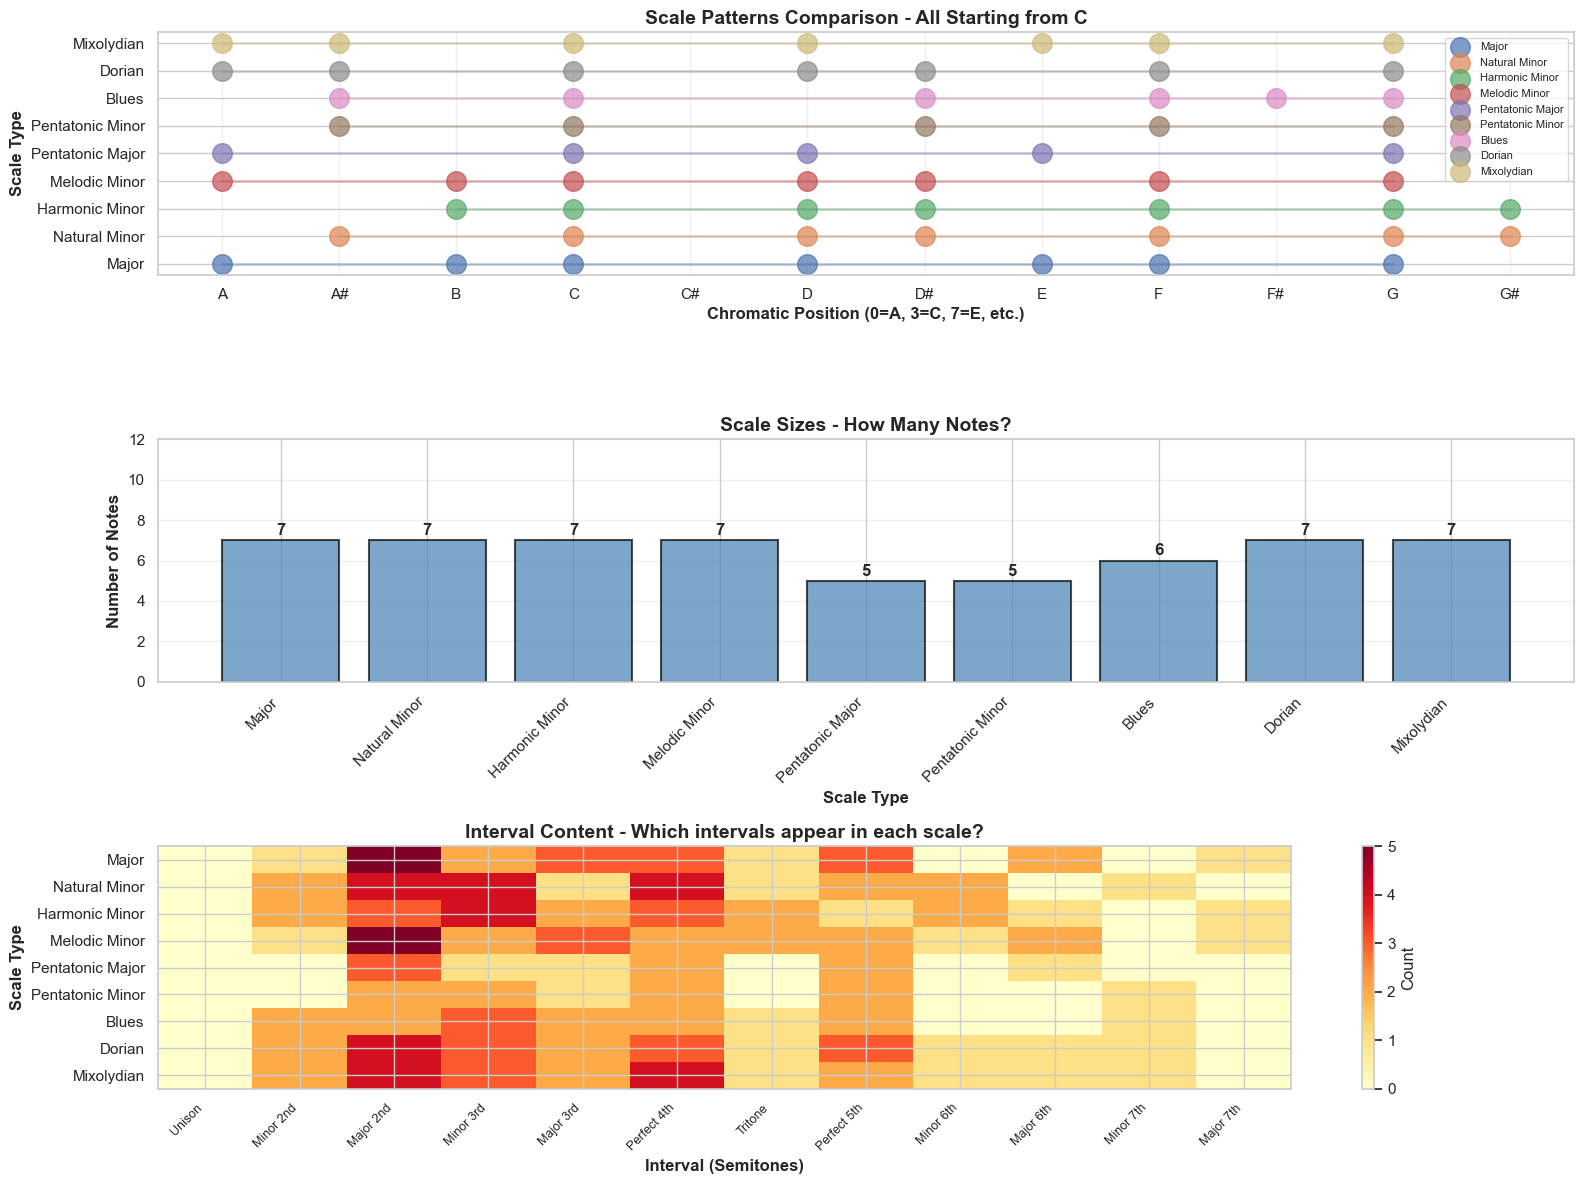


💡 What This Shows:
   • Top: Different scales use different subsets of the 12 notes
   • Middle: Most scales have 5-7 notes (not all 12!)
   • Bottom: Each scale has a unique 'interval fingerprint'


In [5]:
# Step 1.2: Visualize Scale Patterns
# ------------------------------------
# Let's see how different scales compare

fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# Plot 1: All scales starting from C
ax1 = axes[0]
for i, (scale_name, pattern) in enumerate(scale_patterns.items()):
    notes, indices = generate_scale('C', pattern)
    y_pos = [i] * len(indices)
    ax1.scatter(indices, y_pos, s=200, alpha=0.7, label=scale_name)
    
    # Draw lines connecting the notes
    ax1.plot(indices, y_pos, alpha=0.3, linewidth=2)

ax1.set_xlabel('Chromatic Position (0=A, 3=C, 7=E, etc.)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Scale Type', fontsize=12, fontweight='bold')
ax1.set_title('Scale Patterns Comparison - All Starting from C', fontsize=14, fontweight='bold')
ax1.set_yticks(range(len(scale_patterns)))
ax1.set_yticklabels(scale_patterns.keys())
ax1.set_xticks(range(12))
ax1.set_xticklabels(chromatic)
ax1.grid(True, alpha=0.3, axis='x')
ax1.legend(loc='upper right', fontsize=8)

# Plot 2: Interval distribution in scales
ax2 = axes[1]
scale_names = list(scale_patterns.keys())
x_pos = np.arange(len(scale_names))
widths = [len(pattern) for pattern in scale_patterns.values()]

bars = ax2.bar(x_pos, widths, color='steelblue', edgecolor='black', linewidth=1.5, alpha=0.7)
ax2.set_xlabel('Scale Type', fontsize=12, fontweight='bold')
ax2.set_ylabel('Number of Notes', fontsize=12, fontweight='bold')
ax2.set_title('Scale Sizes - How Many Notes?', fontsize=14, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(scale_names, rotation=45, ha='right')
ax2.set_ylim(0, 12)
ax2.grid(True, alpha=0.3, axis='y')

# Annotate bars
for bar, width in zip(bars, widths):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(width)}', ha='center', va='bottom', fontweight='bold')

# Plot 3: Interval content analysis
ax3 = axes[2]
interval_counts = {}
for scale_name, pattern in scale_patterns.items():
    intervals = []
    for i in range(len(pattern)):
        for j in range(i + 1, len(pattern)):
            interval = (pattern[j] - pattern[i]) % 12
            intervals.append(interval)
    interval_counts[scale_name] = Counter(intervals)

# Create a heatmap of interval content
interval_matrix = np.zeros((len(scale_patterns), 12))
for i, scale_name in enumerate(scale_patterns.keys()):
    for interval, count in interval_counts[scale_name].items():
        interval_matrix[i, interval] = count

im = ax3.imshow(interval_matrix, cmap='YlOrRd', aspect='auto')
ax3.set_xlabel('Interval (Semitones)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Scale Type', fontsize=12, fontweight='bold')
ax3.set_title('Interval Content - Which intervals appear in each scale?', fontsize=14, fontweight='bold')
ax3.set_xticks(range(12))
ax3.set_xticklabels([interval_name(i) for i in range(12)], rotation=45, ha='right', fontsize=9)
ax3.set_yticks(range(len(scale_patterns)))
ax3.set_yticklabels(scale_patterns.keys())
plt.colorbar(im, ax=ax3, label='Count')

plt.tight_layout()
plt.show()

print("\n💡 What This Shows:")
print("   • Top: Different scales use different subsets of the 12 notes")
print("   • Middle: Most scales have 5-7 notes (not all 12!)")
print("   • Bottom: Each scale has a unique 'interval fingerprint'")

In [6]:
# Step 1.3: Why Do Scales Work? Consonance Analysis
# ---------------------------------------------------
# Scales work because they MAXIMIZE consonant intervals
# Let's prove this mathematically

def calculate_scale_consonance(pattern):
    """
    Calculate average consonance of all intervals in a scale
    Consonance based on simple frequency ratios
    """
    # Consonance scores for each interval (based on ratio simplicity)
    consonance_map = {
        0: 1.0,    # Unison (1:1)
        7: 0.95,   # Perfect 5th (3:2)
        5: 0.90,   # Perfect 4th (4:3)
        4: 0.85,   # Major 3rd (5:4)
        3: 0.80,   # Minor 3rd (6:5)
        9: 0.75,   # Major 6th (5:3)
        8: 0.70,   # Minor 6th (8:5)
        2: 0.60,   # Major 2nd
        10: 0.55,  # Minor 7th
        11: 0.50,  # Major 7th
        1: 0.40,   # Minor 2nd
        6: 0.30,   # Tritone (most dissonant)
    }
    
    # Calculate all intervals in the scale
    intervals = []
    for i in range(len(pattern)):
        for j in range(i + 1, len(pattern)):
            interval = (pattern[j] - pattern[i]) % 12
            intervals.append(interval)
    
    # Calculate average consonance
    consonances = [consonance_map[interval] for interval in intervals]
    avg_consonance = np.mean(consonances) if consonances else 0
    
    return avg_consonance, intervals

# Analyze all scales
scale_analysis = []
for scale_name, pattern in scale_patterns.items():
    consonance, intervals = calculate_scale_consonance(pattern)
    
    # Count perfect intervals (5ths and 4ths)
    perfect_count = sum(1 for i in intervals if i in [5, 7])
    
    # Count dissonant intervals (tritone, minor 2nd)
    dissonant_count = sum(1 for i in intervals if i in [1, 6])
    
    scale_analysis.append({
        'scale': scale_name,
        'num_notes': len(pattern),
        'consonance_score': consonance,
        'perfect_intervals': perfect_count,
        'dissonant_intervals': dissonant_count,
        'total_intervals': len(intervals)
    })

analysis_df = pd.DataFrame(scale_analysis).sort_values('consonance_score', ascending=False)

print("🎼 SCALE CONSONANCE ANALYSIS:\n")
print(analysis_df.to_string(index=False))

print("\n\n💡 Key Insights:")
print(f"   • Most consonant: {analysis_df.iloc[0]['scale']}")
print(f"   • Least consonant: {analysis_df.iloc[-1]['scale']}")
print("\n   Why Pentatonic scales are so popular:")
print("   • They avoid dissonant intervals (no minor 2nds, no tritones)")
print("   • Almost impossible to play a 'wrong' note")
print("   • This is why they're great for improvisation!")
print("\n   Why Blues scale sounds 'tense':")
print("   • Includes the tritone (most dissonant interval)")
print("   • That tension is what makes blues sound like blues!")
print("\n   Major vs Minor:")
print("   • Similar consonance scores")
print("   • Different EMOTIONAL quality from different intervals")

🎼 SCALE CONSONANCE ANALYSIS:

           scale  num_notes  consonance_score  perfect_intervals  dissonant_intervals  total_intervals
Pentatonic Major          5          0.790000                  4                    0               10
Pentatonic Minor          5          0.790000                  4                    0               10
           Major          7          0.733333                  6                    2               21
          Dorian          7          0.721429                  6                    3               21
      Mixolydian          7          0.719048                  6                    3               21
   Natural Minor          7          0.714286                  6                    3               21
           Blues          6          0.710000                  4                    3               15
   Melodic Minor          7          0.692857                  4                    3               21
  Harmonic Minor          7          0.6857

In [7]:
# Step 1.4: Finding Scales on the Ukulele Fretboard
# ---------------------------------------------------
# Where can you play these scales on your uke?

def find_scale_positions(root_note, pattern, string='C', start_fret=0):
    """Find where a scale can be played on a single string"""
    scale_notes, _ = generate_scale(root_note, pattern)
    
    # Get all positions on this string
    string_data = df[df['string'] == string].sort_values('fret')
    
    positions = []
    for _, row in string_data.iterrows():
        if row['note'] in scale_notes and row['fret'] >= start_fret:
            positions.append({
                'fret': row['fret'],
                'note': row['note'],
                'frequency': row['frequency_hz']
            })
    
    return positions

# Example: C Major scale on C string
print("🎸 C MAJOR SCALE ON C STRING:\n")
c_major_positions = find_scale_positions('C', scale_patterns['Major'], 'C')

for pos in c_major_positions:
    print(f"   Fret {pos['fret']:2d}: {pos['note']:3s} ({pos['frequency']:.2f} Hz)")

print("\n💡 Practice Tip:")
print("   Play these frets in order - that's the C major scale!")
print("   This is the foundation of melodies in the key of C")

# Show scale across all strings
print("\n\n🎸 C MAJOR SCALE - ALL STRINGS (First Octave):\n")
print("   String | Frets with C Major notes")
print("   -------|" + "-"*40)

for string in ['G', 'C', 'E', 'A']:
    positions = find_scale_positions('C', scale_patterns['Major'], string)
    frets = [str(p['fret']) for p in positions[:7]]  # First 7 positions
    notes = [p['note'] for p in positions[:7]]
    
    fret_str = ', '.join([f"{f}({n})" for f, n in zip(frets, notes)])
    print(f"   {string:6s} | {fret_str}")

print("\n💡 This shows you WHERE to find C major notes on each string")
print("   You can now create melodies by connecting these positions!")

🎸 C MAJOR SCALE ON C STRING:

   Fret  0: C   (261.63 Hz)
   Fret  2: D   (293.67 Hz)
   Fret  4: E   (329.63 Hz)
   Fret  5: F   (349.23 Hz)
   Fret  7: G   (392.00 Hz)
   Fret  9: A   (440.01 Hz)
   Fret 11: B   (493.89 Hz)
   Fret 12: C   (523.26 Hz)

💡 Practice Tip:
   Play these frets in order - that's the C major scale!
   This is the foundation of melodies in the key of C


🎸 C MAJOR SCALE - ALL STRINGS (First Octave):

   String | Frets with C Major notes
   -------|----------------------------------------
   G      | 0(G), 2(A), 4(B), 5(C), 7(D), 9(E), 10(F)
   C      | 0(C), 2(D), 4(E), 5(F), 7(G), 9(A), 11(B)
   E      | 0(E), 1(F), 3(G), 5(A), 7(B), 8(C), 10(D)
   A      | 0(A), 2(B), 3(C), 5(D), 7(E), 8(F), 10(G)

💡 This shows you WHERE to find C major notes on each string
   You can now create melodies by connecting these positions!


In [8]:
# =========================================================================
# PART 2: HARMONIC SERIES - The Physics of Music
# =========================================================================
# When you pluck a string, it doesn't just vibrate at ONE frequency
# It vibrates at MULTIPLE frequencies simultaneously (harmonics/overtones)
# This is WHY certain intervals sound consonant - they share harmonics!

print("\n" + "="*70)
print("🌊 PART 2: HARMONIC SERIES - THE PHYSICS BEHIND HARMONY")
print("="*70)


🌊 PART 2: HARMONIC SERIES - THE PHYSICS BEHIND HARMONY


In [9]:
# Step 2.1: Generate Harmonic Series
# ------------------------------------
# When you play a note, you hear the fundamental + overtones
# Overtones are integer multiples of the fundamental frequency

def generate_harmonics(fundamental_freq, num_harmonics=16):
    """
    Generate the harmonic series for a given fundamental frequency
    
    Harmonic series: f, 2f, 3f, 4f, 5f, 6f, ...
    These are the natural resonances of a vibrating string
    """
    harmonics = []
    for n in range(1, num_harmonics + 1):
        freq = fundamental_freq * n
        
        # Find the closest note in equal temperament
        semitones_from_a4 = 12 * np.log2(freq / 440)
        closest_semitone = round(semitones_from_a4)
        closest_note_idx = (9 + closest_semitone) % 12  # 9 = A in our chromatic array
        closest_note = chromatic[closest_note_idx]
        
        # Calculate how far off from equal temperament
        equal_temp_freq = 440 * (2 ** (closest_semitone / 12))
        cents_off = 1200 * np.log2(freq / equal_temp_freq)
        
        harmonics.append({
            'harmonic_number': n,
            'frequency': freq,
            'closest_note': closest_note,
            'cents_deviation': cents_off,
            'interval_from_fundamental': interval_name(closest_semitone % 12)
        })
    
    return harmonics

# Generate harmonics for C (261.63 Hz)
c_fundamental = 261.63
c_harmonics = generate_harmonics(c_fundamental, 16)

print("🌊 HARMONIC SERIES OF C (261.63 Hz):\n")
print("When you play a C note, you're ACTUALLY hearing all of these frequencies:")
print("\nHarmonic | Frequency | Closest Note | Cents Off | Interval")
print("-"*70)

for h in c_harmonics[:12]:  # Show first 12
    print(f"   {h['harmonic_number']:2d}    | {h['frequency']:8.2f} | "
          f"{h['closest_note']:12s} | {h['cents_deviation']:9.1f} | "
          f"{h['interval_from_fundamental']}")

print("\n💡 Key Observations:")
print("   • Harmonic 1: The fundamental (what you think you're hearing)")
print("   • Harmonic 2: Octave (2:1 ratio) - perfectly in tune!")
print("   • Harmonic 3: Perfect 5th (3:2 ratio) - slightly sharp")
print("   • Harmonic 4: Another octave (4:1 ratio)")
print("   • Harmonic 5: Major 3rd (5:4 ratio) - noticeably sharp")
print("\n   The CONSONANT INTERVALS appear early in the harmonic series!")
print("   This is WHY they sound good - they're physically natural!")

🌊 HARMONIC SERIES OF C (261.63 Hz):

When you play a C note, you're ACTUALLY hearing all of these frequencies:

Harmonic | Frequency | Closest Note | Cents Off | Interval
----------------------------------------------------------------------
    1    |   261.63 | A            |       0.0 | Minor 3rd
    2    |   523.26 | A            |       0.0 | Minor 3rd
    3    |   784.89 | E            |       2.0 | Minor 7th
    4    |  1046.52 | A            |       0.0 | Minor 3rd
    5    |  1308.15 | C#           |     -13.7 | Perfect 5th
    6    |  1569.78 | E            |       2.0 | Minor 7th
    7    |  1831.41 | G            |     -31.1 | Minor 2nd
    8    |  2093.04 | A            |       0.0 | Minor 3rd
    9    |  2354.67 | B            |       3.9 | Perfect 4th
   10    |  2616.30 | C#           |     -13.7 | Perfect 5th
   11    |  2877.93 | D#           |     -48.7 | Major 6th
   12    |  3139.56 | E            |       2.0 | Minor 7th

💡 Key Observations:
   • Harmonic 1: The fu

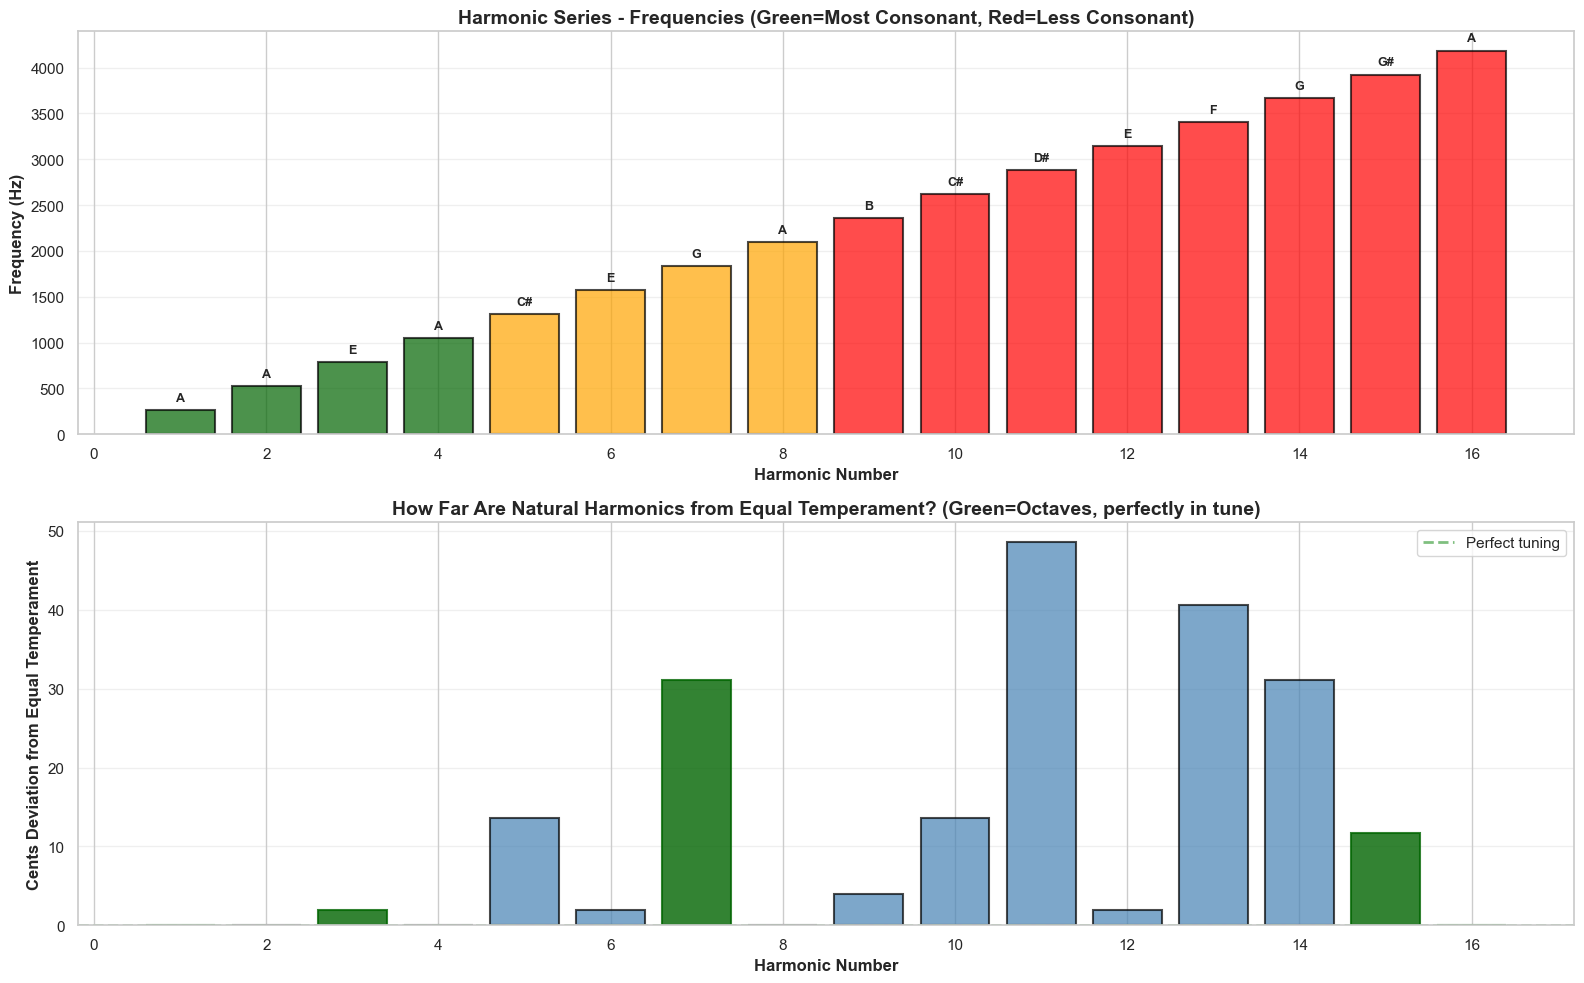


🎯 THE BIG REVEAL:
   • Equal temperament is a COMPROMISE
   • Natural harmonics (physics) don't perfectly match equal temperament (math)
   • Octaves (2:1, 4:1, 8:1) are PERFECT in both systems
   • Other intervals are slightly off

   This is the eternal tension in Western music:
   Physics says: 'Use pure ratios (3:2, 5:4, etc.)'
   Math says: 'Use equal temperament (2^(n/12))'
   We chose math (equal temperament) so we can play in all keys!
   But we HEAR physics (harmonics) - that's why some intervals 'ring'


In [10]:
# Step 2.2: Visualize the Harmonic Series
# -----------------------------------------

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Plot 1: Harmonic frequencies
ax1 = axes[0]
harmonic_nums = [h['harmonic_number'] for h in c_harmonics]
frequencies = [h['frequency'] for h in c_harmonics]

# Color code by consonance (early harmonics = more consonant)
colors = ['darkgreen' if n <= 4 else 'orange' if n <= 8 else 'red' 
          for n in harmonic_nums]

ax1.bar(harmonic_nums, frequencies, color=colors, edgecolor='black', 
        linewidth=1.5, alpha=0.7)
ax1.set_xlabel('Harmonic Number', fontsize=12, fontweight='bold')
ax1.set_ylabel('Frequency (Hz)', fontsize=12, fontweight='bold')
ax1.set_title('Harmonic Series - Frequencies (Green=Most Consonant, Red=Less Consonant)', 
              fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Add note labels
for i, h in enumerate(c_harmonics):
    ax1.text(h['harmonic_number'], h['frequency'] + 100, 
             h['closest_note'], ha='center', fontsize=9, fontweight='bold')

# Plot 2: Cents deviation from equal temperament
ax2 = axes[1]
cents_devs = [abs(h['cents_deviation']) for h in c_harmonics]

bars = ax2.bar(harmonic_nums, cents_devs, color='steelblue', 
               edgecolor='black', linewidth=1.5, alpha=0.7)

# Highlight the perfectly in-tune harmonics (powers of 2)
for i, n in enumerate(harmonic_nums):
    if n in [1, 2, 4, 8, 16]:
        bars[i-1].set_color('darkgreen')
        bars[i-1].set_alpha(0.8)

ax2.axhline(y=0, color='green', linestyle='--', linewidth=2, alpha=0.5, 
            label='Perfect tuning')
ax2.set_xlabel('Harmonic Number', fontsize=12, fontweight='bold')
ax2.set_ylabel('Cents Deviation from Equal Temperament', fontsize=12, fontweight='bold')
ax2.set_title('How Far Are Natural Harmonics from Equal Temperament? (Green=Octaves, perfectly in tune)', 
              fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
ax2.legend()

plt.tight_layout()
plt.show()

print("\n🎯 THE BIG REVEAL:")
print("   • Equal temperament is a COMPROMISE")
print("   • Natural harmonics (physics) don't perfectly match equal temperament (math)")
print("   • Octaves (2:1, 4:1, 8:1) are PERFECT in both systems")
print("   • Other intervals are slightly off")
print("\n   This is the eternal tension in Western music:")
print("   Physics says: 'Use pure ratios (3:2, 5:4, etc.)'")
print("   Math says: 'Use equal temperament (2^(n/12))'")
print("   We chose math (equal temperament) so we can play in all keys!")
print("   But we HEAR physics (harmonics) - that's why some intervals 'ring'")

In [ ]:
# Step 2.3: Harmonic Overlap - Why Consonance Works
# ---------------------------------------------------
# When two notes share harmonics, they sound consonant
# Let's visualize this

def find_harmonic_overlap(freq1, freq2, num_harmonics=12):
    """
    Find which harmonics overlap between two notes
    Overlap = harmonics within 50 cents of each other
    """
    h1 = generate_harmonics(freq1, num_harmonics)
    h2 = generate_harmonics(freq2, num_harmonics)
    
    overlaps = []
    for harm1 in h1:
        for harm2 in h2:
            cents_diff = abs(1200 * np.log2(harm1['frequency'] / harm2['frequency']))
            if cents_diff < 50:  # Within 50 cents = "overlap"
                overlaps.append({
                    'harm1_num': harm1['harmonic_number'],
                    'harm2_num': harm2['harmonic_number'],
                    'frequency': harm1['frequency'],
                    'cents_diff': cents_diff
                })
    
    return overlaps

# Compare C and G (Perfect 5th - very consonant)
c_freq = 261.63
g_freq = 392.0  # Perfect 5th above C

print("🎵 HARMONIC OVERLAP: C and G (Perfect 5th)\n")
cg_overlaps = find_harmonic_overlap(c_freq, g_freq)

print(f"Found {len(cg_overlaps)} overlapping harmonics:")
print("\nC Harmonic | G Harmonic | Frequency | Cents Apart")
print("-"*60)
for overlap in cg_overlaps[:8]:
    print(f"    {overlap['harm1_num']:2d}     |     {overlap['harm2_num']:2d}     | "
          f"{overlap['frequency']:8.2f} | {overlap['cents_diff']:6.1f}")

# Compare C and C# (Minor 2nd - very dissonant)
cs_freq = 277.19  # Minor 2nd above C

print("\n\n🎵 HARMONIC OVERLAP: C and C# (Minor 2nd)\n")
ccs_overlaps = find_harmonic_overlap(c_freq, cs_freq)

print(f"Found {len(ccs_overlaps)} overlapping harmonics:")
print("\nC Harmonic | C# Harmonic | Frequency | Cents Apart")
print("-"*60)
for overlap in ccs_overlaps[:8]:
    print(f"    {overlap['harm1_num']:2d}     |     {overlap['harm2_num']:2d}      | "
          f"{overlap['frequency']:8.2f} | {overlap['cents_diff']:6.1f}")

print("\n\n💡 THE PHYSICS OF CONSONANCE:")
print("   • C + G (Perfect 5th): MANY overlapping harmonics")
print("     → Harmonics reinforce each other")
print("     → Sounds stable, 'locked in', consonant")
print("\n   • C + C# (Minor 2nd): FEW overlapping harmonics")
print("     → Harmonics clash and create beating")
print("     → Sounds unstable, tense, dissonant")
print("\n   Consonance isn't subjective - it's PHYSICS!")
print("   Your brain detects harmonic overlap and calls it 'pleasant'")

In [ ]:
# =========================================================================
# PART 3: CHORD PROGRESSIONS - The Grammar of Music
# =========================================================================
# Chords don't exist in isolation - they MOVE
# Certain movements feel "natural" or "complete"
# Let's discover the patterns

print("\n" + "="*70)
print("🎼 PART 3: CHORD PROGRESSIONS - HOW CHORDS MOVE")
print("="*70)

In [ ]:
# Step 3.1: Diatonic Chords - Chords Built from a Scale
# -------------------------------------------------------
# In any key, you can build chords on each scale degree
# These are the "native" chords of that key

def build_diatonic_chords(root_note, scale_pattern):
    """
    Build chords on each degree of a scale
    Uses 'tertian harmony' - stacking thirds (skip one note pattern)
    """
    scale_notes, scale_indices = generate_scale(root_note, scale_pattern)
    
    chords = []
    for i, note in enumerate(scale_notes):
        # Build a triad: root, third (skip 1), fifth (skip 2)
        chord_indices = [i, (i + 2) % len(scale_notes), (i + 4) % len(scale_notes)]
        chord_notes = [scale_notes[idx] for idx in chord_indices]
        
        # Determine chord quality (major, minor, diminished)
        root_idx = scale_indices[i]
        third_idx = scale_indices[chord_indices[1]]
        fifth_idx = scale_indices[chord_indices[2]]
        
        # Calculate intervals
        third_interval = (third_idx - root_idx) % 12
        fifth_interval = (fifth_idx - root_idx) % 12
        
        # Classify chord type
        if third_interval == 4 and fifth_interval == 7:
            quality = 'Major'
        elif third_interval == 3 and fifth_interval == 7:
            quality = 'Minor'
        elif third_interval == 3 and fifth_interval == 6:
            quality = 'Diminished'
        elif third_interval == 4 and fifth_interval == 8:
            quality = 'Augmented'
        else:
            quality = 'Other'
        
        chords.append({
            'degree': i + 1,
            'roman': ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII'][i],
            'root': note,
            'notes': chord_notes,
            'quality': quality
        })
    
    return chords

# Build chords in C Major
c_major_chords = build_diatonic_chords('C', scale_patterns['Major'])

print("🎵 DIATONIC CHORDS IN C MAJOR:\n")
print("Degree | Roman | Chord | Notes          | Quality")
print("-"*65)

for chord in c_major_chords:
    notes_str = '-'.join(chord['notes'])
    roman = chord['roman'].lower() if chord['quality'] == 'Minor' else chord['roman']
    if chord['quality'] == 'Diminished':
        roman += '°'
    
    print(f"  {chord['degree']}    |  {roman:4s}  | {chord['root']:3s}   | "
          f"{notes_str:14s} | {chord['quality']}")

print("\n💡 The Pattern in Major Keys:")
print("   I, IV, V    → Major chords (the 'strong' chords)")
print("   ii, iii, vi → Minor chords (the 'color' chords)")
print("   vii°        → Diminished chord (the 'tension' chord)")
print("\n   This pattern is the SAME in every major key!")
print("   (Just different notes, same structure)")

# Compare with C Minor
c_minor_chords = build_diatonic_chords('C', scale_patterns['Natural Minor'])

print("\n\n🎵 DIATONIC CHORDS IN C MINOR:\n")
print("Degree | Roman | Chord | Notes          | Quality")
print("-"*65)

for chord in c_minor_chords:
    notes_str = '-'.join(chord['notes'])
    roman = chord['roman'].lower() if chord['quality'] == 'Minor' else chord['roman']
    if chord['quality'] == 'Diminished':
        roman += '°'
    
    print(f"  {chord['degree']}    |  {roman:4s}  | {chord['root']:3s}   | "
          f"{notes_str:14s} | {chord['quality']}")

print("\n💡 The Pattern in Minor Keys:")
print("   i, iv       → Minor chords")
print("   III, VI, VII → Major chords")
print("   ii°         → Diminished chord")
print("\n   Different from major, but still predictable!")

In [ ]:
# Step 3.2: Common Chord Progressions
# -------------------------------------
# Certain progressions appear EVERYWHERE in music
# Let's analyze why they work

common_progressions = {
    'I-IV-V-I': [1, 4, 5, 1],           # Most basic progression
    'I-V-vi-IV': [1, 5, 6, 4],          # "Pop progression" (millions of songs)
    'I-vi-IV-V': [1, 6, 4, 5],          # "50s progression" (doo-wop)
    'ii-V-I': [2, 5, 1],                # Jazz cadence
    'I-IV-I-V': [1, 4, 1, 5],           # Blues progression
    'vi-IV-I-V': [6, 4, 1, 5],          # "Sad pop" progression
    'I-iii-IV-V': [1, 3, 4, 5],         # Alternative progression
}

def analyze_progression(progression_degrees, key_chords):
    """Analyze a chord progression"""
    progression_chords = []
    
    for degree in progression_degrees:
        chord = key_chords[degree - 1]
        progression_chords.append(chord)
    
    return progression_chords

print("🎸 FAMOUS CHORD PROGRESSIONS IN C MAJOR:\n")

for prog_name, degrees in common_progressions.items():
    print(f"\n{prog_name}:")
    chords = analyze_progression(degrees, c_major_chords)
    
    chord_names = []
    for chord in chords:
        quality_abbrev = '' if chord['quality'] == 'Major' else 'm' if chord['quality'] == 'Minor' else '°'
        chord_names.append(f"{chord['root']}{quality_abbrev}")
    
    print(f"   Chords: {' → '.join(chord_names)}")
    print(f"   Roman:  {' → '.join([c['roman'] for c in chords])}")
    
    # Calculate root movement
    movements = []
    for i in range(len(chords) - 1):
        root1_idx = note_to_index(chords[i]['root'])
        root2_idx = note_to_index(chords[i + 1]['root'])
        movement = (root2_idx - root1_idx) % 12
        movements.append(movement)
    
    movement_str = ', '.join([f"{m} semitones" for m in movements])
    print(f"   Root movement: {movement_str}")

print("\n\n💡 Why These Progressions Work:\n")

print("1. I-IV-V-I (The Foundation)")
print("   • Moves through the three MAJOR chords")
print("   • V→I is the strongest resolution in music")
print("   • This is the backbone of Western harmony")

print("\n2. I-V-vi-IV (The Pop Formula)")
print("   • Used in THOUSANDS of pop songs")
print("   • Mix of major and minor creates emotional depth")
print("   • Strong (I, V) + Soft (vi, IV) = perfect balance")

print("\n3. ii-V-I (Jazz Cadence)")
print("   • The 'proper' way to resolve to I")
print("   • ii prepares, V creates tension, I resolves")
print("   • Root movement by 5ths (strongest harmonic motion)")

print("\n🎯 The Pattern:")
print("   • Strong chords (I, IV, V) create stability")
print("   • Weak chords (ii, iii, vi) create movement")
print("   • V→I is the strongest resolution (dominant to tonic)")
print("   • Root movement by 4ths/5ths sounds strongest")
print("\n   This isn't arbitrary - it's based on the harmonic series!")

In [ ]:
# Step 3.3: Visualizing Chord Relationships
# -------------------------------------------
# The Circle of Fifths - the map of all keys

def calculate_circle_of_fifths():
    """Generate the circle of fifths"""
    circle = []
    current_note = 'C'
    
    for i in range(12):
        circle.append(current_note)
        # Move up a perfect 5th (7 semitones)
        current_idx = note_to_index(current_note)
        next_idx = (current_idx + 7) % 12
        current_note = chromatic[next_idx]
    
    return circle

circle = calculate_circle_of_fifths()

print("🔄 THE CIRCLE OF FIFTHS:\n")
print("   " + " → ".join(circle) + " → (back to C)")

print("\n💡 What This Shows:")
print("   • Moving clockwise = up a 5th (strongest harmonic motion)")
print("   • Moving counter-clockwise = up a 4th")
print("   • Adjacent keys are closely related (differ by 1 note)")
print("   • Opposite keys are distant (differ by 6 notes)")

# Visualize as a circle
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

# Calculate positions
angles = np.linspace(0, 2 * np.pi, 12, endpoint=False)
# Rotate so C is at top
angles = angles - np.pi / 2

# Plot the circle
for i, (angle, note) in enumerate(zip(angles, circle)):
    # Plot point
    ax.plot([angle], [1], 'o', markersize=30, color='steelblue', 
            markeredgecolor='black', markeredgewidth=2)
    
    # Add label
    label_distance = 1.25
    ax.text(angle, label_distance, note, ha='center', va='center', 
            fontsize=16, fontweight='bold')
    
    # Draw line to next note
    next_angle = angles[(i + 1) % 12]
    ax.plot([angle, next_angle], [1, 1], 'b-', linewidth=2, alpha=0.3)

# Highlight the I-IV-V relationship in C major
c_idx = circle.index('C')
f_idx = circle.index('F')
g_idx = circle.index('G')

ax.plot([angles[c_idx]], [1], 'o', markersize=35, color='green', 
        markeredgecolor='black', markeredgewidth=3, alpha=0.5, label='I (C)')
ax.plot([angles[f_idx]], [1], 'o', markersize=35, color='orange', 
        markeredgecolor='black', markeredgewidth=3, alpha=0.5, label='IV (F)')
ax.plot([angles[g_idx]], [1], 'o', markersize=35, color='red', 
        markeredgecolor='black', markeredgewidth=3, alpha=0.5, label='V (G)')

ax.set_ylim(0, 1.5)
ax.set_yticks([])
ax.set_xticks([])
ax.set_title('The Circle of Fifths\n(I-IV-V highlighted for C major)', 
             fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()

print("\n🎸 Practical Use:")
print("   • I, IV, V are ADJACENT on the circle")
print("   • This is why they work together so well")
print("   • To transpose a song: rotate around the circle")
print("   • To modulate smoothly: move to adjacent keys")

In [ ]:
# =========================================================================
# PART 4: MELODY ANALYSIS - How Notes Flow
# =========================================================================
# Melodies aren't random - they follow patterns
# Let's discover the rules

print("\n" + "="*70)
print("🎶 PART 4: MELODY ANALYSIS - THE FLOW OF NOTES")
print("="*70)

In [ ]:
# Step 4.1: Melodic Intervals - How Melodies Move
# -------------------------------------------------
# Good melodies balance STEPS (small intervals) and LEAPS (large intervals)

def analyze_melody(notes):
    """
    Analyze a melody's interval structure
    
    Parameters:
    - notes: list of note names (e.g., ['C', 'D', 'E', 'G'])
    
    Returns analysis dict
    """
    if len(notes) < 2:
        return None
    
    intervals = []
    for i in range(len(notes) - 1):
        note1_idx = chromatic.index(notes[i])
        note2_idx = chromatic.index(notes[i + 1])
        
        # Calculate interval (always positive, smallest distance)
        interval = (note2_idx - note1_idx) % 12
        if interval > 6:
            interval = 12 - interval  # Use smaller interval
            direction = 'down'
        else:
            direction = 'up'
        
        intervals.append({
            'from': notes[i],
            'to': notes[i + 1],
            'semitones': interval,
            'direction': direction,
            'name': interval_name(interval)
        })
    
    # Classify intervals
    steps = sum(1 for i in intervals if i['semitones'] <= 2)
    leaps = sum(1 for i in intervals if i['semitones'] > 2)
    
    return {
        'intervals': intervals,
        'total_movements': len(intervals),
        'steps': steps,
        'leaps': leaps,
        'step_percentage': (steps / len(intervals)) * 100 if intervals else 0
    }

# Example 1: "Twinkle Twinkle Little Star" (C major)
twinkle = ['C', 'C', 'G', 'G', 'A', 'A', 'G']
print("🎵 MELODY ANALYSIS: 'Twinkle Twinkle Little Star'\n")
print(f"Notes: {' - '.join(twinkle)}\n")

twinkle_analysis = analyze_melody(twinkle)

print("Interval Movements:")
for i, interval in enumerate(twinkle_analysis['intervals'], 1):
    print(f"   {i}. {interval['from']} → {interval['to']}: "
          f"{interval['semitones']} semitones {interval['direction']} ({interval['name']})")

print(f"\nSummary:")
print(f"   Steps (≤2 semitones): {twinkle_analysis['steps']}")
print(f"   Leaps (>2 semitones): {twinkle_analysis['leaps']}")
print(f"   Step percentage: {twinkle_analysis['step_percentage']:.1f}%")

# Example 2: "Happy Birthday"
happy_birthday = ['G', 'G', 'A', 'G', 'C', 'B']
print("\n\n🎵 MELODY ANALYSIS: 'Happy Birthday'\n")
print(f"Notes: {' - '.join(happy_birthday)}\n")

hb_analysis = analyze_melody(happy_birthday)

print("Interval Movements:")
for i, interval in enumerate(hb_analysis['intervals'], 1):
    print(f"   {i}. {interval['from']} → {interval['to']}: "
          f"{interval['semitones']} semitones {interval['direction']} ({interval['name']})")

print(f"\nSummary:")
print(f"   Steps: {hb_analysis['steps']}")
print(f"   Leaps: {hb_analysis['leaps']}")
print(f"   Step percentage: {hb_analysis['step_percentage']:.1f}%")

print("\n\n💡 Melodic Principles:")
print("   • Good melodies are mostly STEPWISE (60-80% steps)")
print("   • Leaps add interest but should be balanced")
print("   • After a leap, melodies often move by step (recovery)")
print("   • Melodies tend to move within a scale (avoid chromatic chaos)")
print("   • Range matters: too wide = hard to sing, too narrow = boring")

In [ ]:
# Step 4.2: Melody Over Chords - Chord Tones vs Passing Tones
# -------------------------------------------------------------
# Melodies interact with the underlying harmony
# Some notes are "chord tones" (stable), others are "passing tones" (tension)

def analyze_melody_harmony(melody_notes, chord_notes):
    """
    Analyze how a melody relates to a chord
    
    Parameters:
    - melody_notes: list of notes in the melody
    - chord_notes: list of notes in the underlying chord
    
    Returns classification of each melody note
    """
    import builtins  # Use built-in functions explicitly
    
    analysis = []
    
    for note in melody_notes:
        if note in chord_notes:
            role = 'Chord Tone (stable)'
            tension = 0
        else:
            # Calculate distance to nearest chord tone
            note_idx = chromatic.index(note)
            min_distance = 12
            
            for chord_note in chord_notes:
                chord_idx = chromatic.index(chord_note)
                # Calculate both directions around the circle
                diff = builtins.abs(note_idx - chord_idx)
                distance = diff if diff <= 6 else 12 - diff
                # Update minimum
                if distance < min_distance:
                    min_distance = distance
            
            if min_distance == 1:
                role = 'Passing Tone (mild tension)'
                tension = 1
            elif min_distance == 2:
                role = 'Neighbor Tone (moderate tension)'
                tension = 2
            else:
                role = 'Non-harmonic Tone (high tension)'
                tension = 3
        
        analysis.append({
            'note': note,
            'role': role,
            'tension': tension
        })
    
    return analysis

# Example: Melody over C major chord
c_major_chord = ['C', 'E', 'G']
melody_example = ['C', 'D', 'E', 'F', 'G', 'A', 'B', 'C']

print("🎸 MELODY OVER C MAJOR CHORD:\n")
print(f"Chord: {' - '.join(c_major_chord)}")
print(f"Melody: {' - '.join(melody_example)}\n")

harmony_analysis = analyze_melody_harmony(melody_example, c_major_chord)

print("Note | Role")
print("-"*50)
for item in harmony_analysis:
    print(f" {item['note']:3s} | {item['role']}")

print("\n💡 Understanding Melody-Harmony Interaction:")
print("   • Chord Tones (C, E, G): Sound stable, can land on them")
print("   • Passing Tones (D, F): Create movement, don't linger")
print("   • Non-harmonic Tones (A, B): Create tension, resolve to chord tones")
print("\n   Strong beats → use chord tones")
print("   Weak beats → can use passing tones")
print("   This creates the push-pull of melody!")

# Visualize tension over time
fig, ax = plt.subplots(figsize=(14, 6))

positions = range(len(melody_example))
tensions = [item['tension'] for item in harmony_analysis]
colors = ['green' if t == 0 else 'yellow' if t == 1 else 'orange' if t == 2 else 'red' 
          for t in tensions]

bars = ax.bar(positions, tensions, color=colors, edgecolor='black', 
              linewidth=2, alpha=0.7)

# Add note labels
for i, note in enumerate(melody_example):
    ax.text(i, tensions[i] + 0.1, note, ha='center', va='bottom', 
            fontsize=14, fontweight='bold')

ax.set_xlabel('Position in Melody', fontsize=12, fontweight='bold')
ax.set_ylabel('Tension Level', fontsize=12, fontweight='bold')
ax.set_title('Melodic Tension Over C Major Chord\n(Green=Stable, Yellow/Orange=Tension, Red=High Tension)', 
             fontsize=14, fontweight='bold')
ax.set_ylim(0, 3.5)
ax.set_xticks(positions)
ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(['Chord Tone', 'Passing Tone', 'Neighbor Tone', 'Non-harmonic'])
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n🎯 The Pattern:")
print("   Tension → Resolution → Tension → Resolution")
print("   This is the heartbeat of melody!")

In [ ]:
# Step 4.3: Create Your Own Melody - A Simple Algorithm
# -------------------------------------------------------
# Now that we understand the rules, let's generate a melody!

def generate_simple_melody(scale_notes, chord_notes, length=8, step_probability=0.7):
    """
    Generate a simple melody following melodic principles
    
    Parameters:
    - scale_notes: notes to choose from
    - chord_notes: underlying chord (for strong beats)
    - length: number of notes
    - step_probability: probability of stepwise motion (vs leap)
    """
    np.random.seed(42)  # For reproducibility
    
    melody = []
    
    # Start on a chord tone
    current_note = np.random.choice(chord_notes)
    melody.append(current_note)
    
    for i in range(1, length):
        current_idx = chromatic.index(current_note)
        
        # On strong beats (even positions), prefer chord tones
        if i % 2 == 0:
            # 70% chance of chord tone on strong beat
            if np.random.random() < 0.7:
                current_note = np.random.choice(chord_notes)
                melody.append(current_note)
                continue
        
        # Decide: step or leap?
        if np.random.random() < step_probability:
            # Stepwise motion (1-2 semitones)
            step_size = np.random.choice([1, 2, -1, -2])
            next_idx = (current_idx + step_size) % 12
            next_note = chromatic[next_idx]
            
            # Make sure it's in the scale
            if next_note in scale_notes:
                current_note = next_note
            else:
                # If not in scale, pick a nearby scale note
                current_note = np.random.choice(scale_notes)
        else:
            # Leap (3+ semitones)
            current_note = np.random.choice(scale_notes)
        
        melody.append(current_note)
    
    # End on the root (tonic) for closure
    melody[-1] = chord_notes[0]
    
    return melody

# Generate a melody in C major over C major chord
c_major_scale, _ = generate_scale('C', scale_patterns['Major'])
generated_melody = generate_simple_melody(c_major_scale, ['C', 'E', 'G'], length=16)

print("🎵 GENERATED MELODY IN C MAJOR:\n")
print(f"Melody: {' - '.join(generated_melody)}\n")

# Analyze our generated melody
gen_analysis = analyze_melody(generated_melody)
gen_harmony = analyze_melody_harmony(generated_melody, ['C', 'E', 'G'])

print("Analysis:")
print(f"   Total movements: {gen_analysis['total_movements']}")
print(f"   Steps: {gen_analysis['steps']} ({gen_analysis['step_percentage']:.1f}%)")
print(f"   Leaps: {gen_analysis['leaps']}")

print("\nHarmonic Analysis:")
chord_tones = sum(1 for item in gen_harmony if item['tension'] == 0)
passing_tones = sum(1 for item in gen_harmony if item['tension'] > 0)
print(f"   Chord tones: {chord_tones}")
print(f"   Passing/Non-harmonic tones: {passing_tones}")

print("\n💡 What We Just Did:")
print("   • Started on a chord tone (stable)")
print("   • Moved mostly by steps (70% probability)")
print("   • Preferred chord tones on strong beats")
print("   • Ended on the root (closure)")
print("   • Stayed within the C major scale")
print("\n   These simple rules create a coherent melody!")
print("   This is how algorithmic composition works!")

print("\n🎸 Try It Yourself:")
print("   Play these notes on your ukulele (C string works well)")
print("   You'll hear they sound 'musical' even though they're generated!")
print(f"\n   Notes: {' '.join(generated_melody)}")

In [ ]:
# =========================================================================
# PHASE 3 SUMMARY: The Grammar of Music
# =========================================================================

print("\n" + "="*70)
print("🎼 PHASE 3 COMPLETE: THE GRAMMAR OF MUSIC")
print("="*70)

print("\n🎯 What We Discovered:\n")

print("1. SCALES - The Vocabulary")
print("   • Scales are subsets of the 12 chromatic notes")
print("   • Major: W-W-H-W-W-W-H pattern")
print("   • Minor: W-H-W-W-H-W-W pattern")
print("   • Pentatonic: removes dissonant intervals (easy to improvise)")
print("   • Each scale has unique interval content = unique 'flavor'")

print("\n2. HARMONIC SERIES - The Physics")
print("   • Real notes contain multiple frequencies (harmonics)")
print("   • Harmonics are integer multiples: f, 2f, 3f, 4f...")
print("   • Consonant intervals appear early in harmonic series")
print("   • Harmonic overlap = consonance (physics, not opinion!)")
print("   • Equal temperament is a compromise between physics and math")

print("\n3. CHORD PROGRESSIONS - The Grammar")
print("   • Diatonic chords: built from scale degrees")
print("   • Major keys: I, ii, iii, IV, V, vi, vii° (same pattern everywhere)")
print("   • Common progressions: I-IV-V-I, I-V-vi-IV, ii-V-I")
print("   • V→I is strongest resolution (dominant to tonic)")
print("   • Circle of Fifths maps all keys and their relationships")

print("\n4. MELODY - The Flow")
print("   • Good melodies balance steps (60-80%) and leaps")
print("   • Chord tones = stable (land here)")
print("   • Passing tones = tension (move through)")
print("   • Strong beats → chord tones, weak beats → passing tones")
print("   • Tension → Resolution is the heartbeat of melody")

print("\n\n💡 The Meta-Pattern:")
print("   Everything builds from simple rules:")
print("   ")
print("   Physics (harmonic series)")
print("      ↓")
print("   Math (equal temperament: 2^(n/12))")
print("      ↓")
print("   Scales (select consonant subsets)")
print("      ↓")
print("   Chords (stack thirds from scale)")
print("      ↓")
print("   Progressions (move by 4ths/5ths)")
print("      ↓")
print("   Melody (steps + chord tones + tension/resolution)")
print("      ↓")
print("   MUSIC")
print("   ")
print("   Simple rules → Complex patterns → Emotional impact")

print("\n🎸 Practical Takeaways:")
print("   • Scales tell you which notes to use")
print("   • Chords tell you which notes sound good together")
print("   • Progressions tell you how chords move")
print("   • Melody tells you how to connect notes over time")
print("   • All of this is COMPUTABLE and PREDICTABLE")

print("\n🔥 What This Means:")
print("   • Music theory isn't mysterious - it's emergent from physics + math")
print("   • You can GENERATE music algorithmically (we just did!)")
print("   • You can ANALYZE any song using these principles")
print("   • You can BUILD TOOLS that understand music")

print("\n➡️  Next Steps:")
print("   • Build reusable music theory modules")
print("   • Create interactive web tools (visualize + play)")
print("   • Analyze your favorite songs")
print("   • Generate chord progressions and melodies")
print("   • Explore alternative tunings and temperaments")

print("\n" + "="*70)
print("🎵 From frequency measurements to algorithmic composition...")
print("   We've gone DEEP. This is the foundation of everything.")
print("="*70)